In [ ]:
#https://www.kaggle.com/code/nwenwehtaywin/advanced-time-series-forecasting-with-python/edit

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
pio.templates.default = "none"


# Load data
df_trans = pd.read_csv('../dataset/transactions.csv')

# Convert to datetime
df_trans['date'] = pd.to_datetime(df_trans['date'], format = "%Y-%m-%d")
df_trans.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


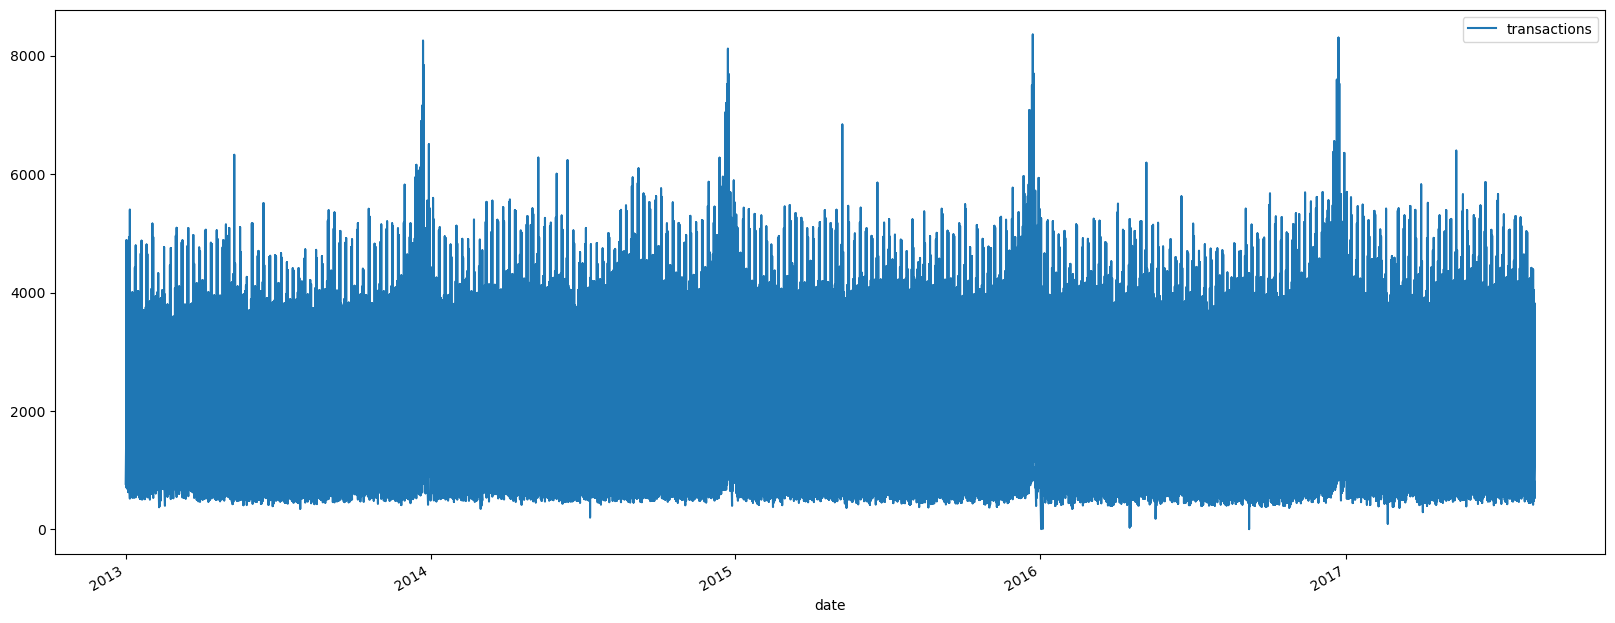

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,8))
df_trans.plot.line(x="date", y="transactions",
                 ax = axes,
#                  rot=0
                )
plt.show()

In [3]:
# Create function to group by the called frequency (W = week, M = month, Y = year)
def grouped(df, key, freq, col):
    """ GROUP DATA WITH CERTAIN FREQUENCY """
    df_grouped = df.groupby([pd.Grouper(key=key, freq=freq)]).agg(mean = (col, 'mean'))
    df_grouped = df_grouped.reset_index()
    return df_grouped

df_grouped_trans_m = grouped(df_trans, 'date', 'M', 'transactions')
df_grouped_trans_w = grouped(df_trans, 'date', 'W', 'transactions')
df_grouped_trans_w.head()

,date,mean
0,2013-01-06,1883.203463
1,2013-01-13,1641.090062
2,2013-01-20,1639.024845
3,2013-01-27,1609.816770
4,2013-02-03,1685.263975


Text(0.5, 1.0, 'Average Daily Sales per Week')

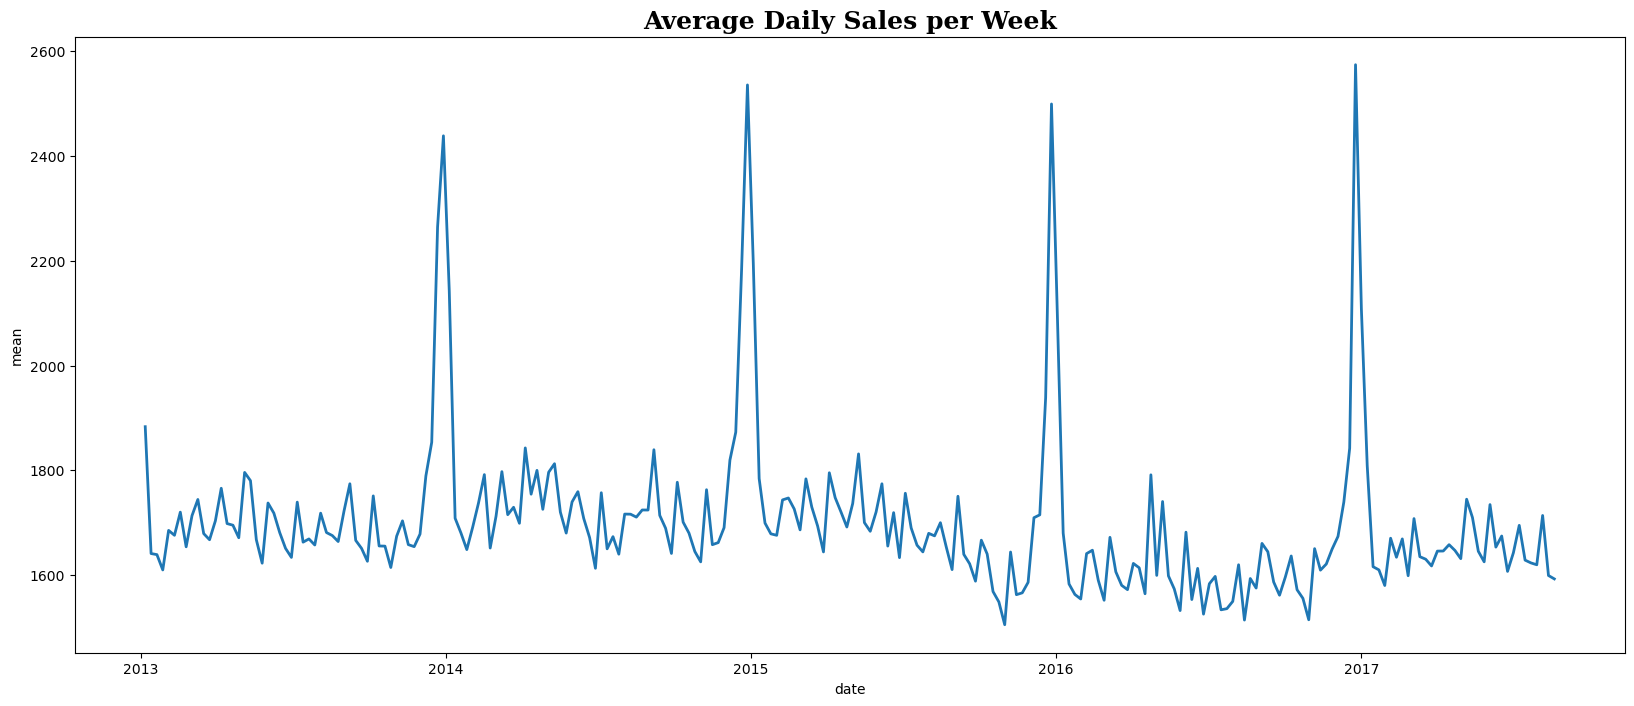

In [4]:
fig = plt.figure(figsize = (20, 8))
sns.lineplot(x = df_grouped_trans_w['date'], y= df_grouped_trans_w['mean'], linewidth=2, )
plt.title("Average Daily Sales per Week",
          fontsize = 18,
          fontweight = 'bold',
          fontfamily = 'serif',
          loc = 'center')

Text(0.5, 1.0, 'Average Daily Sales per Month')

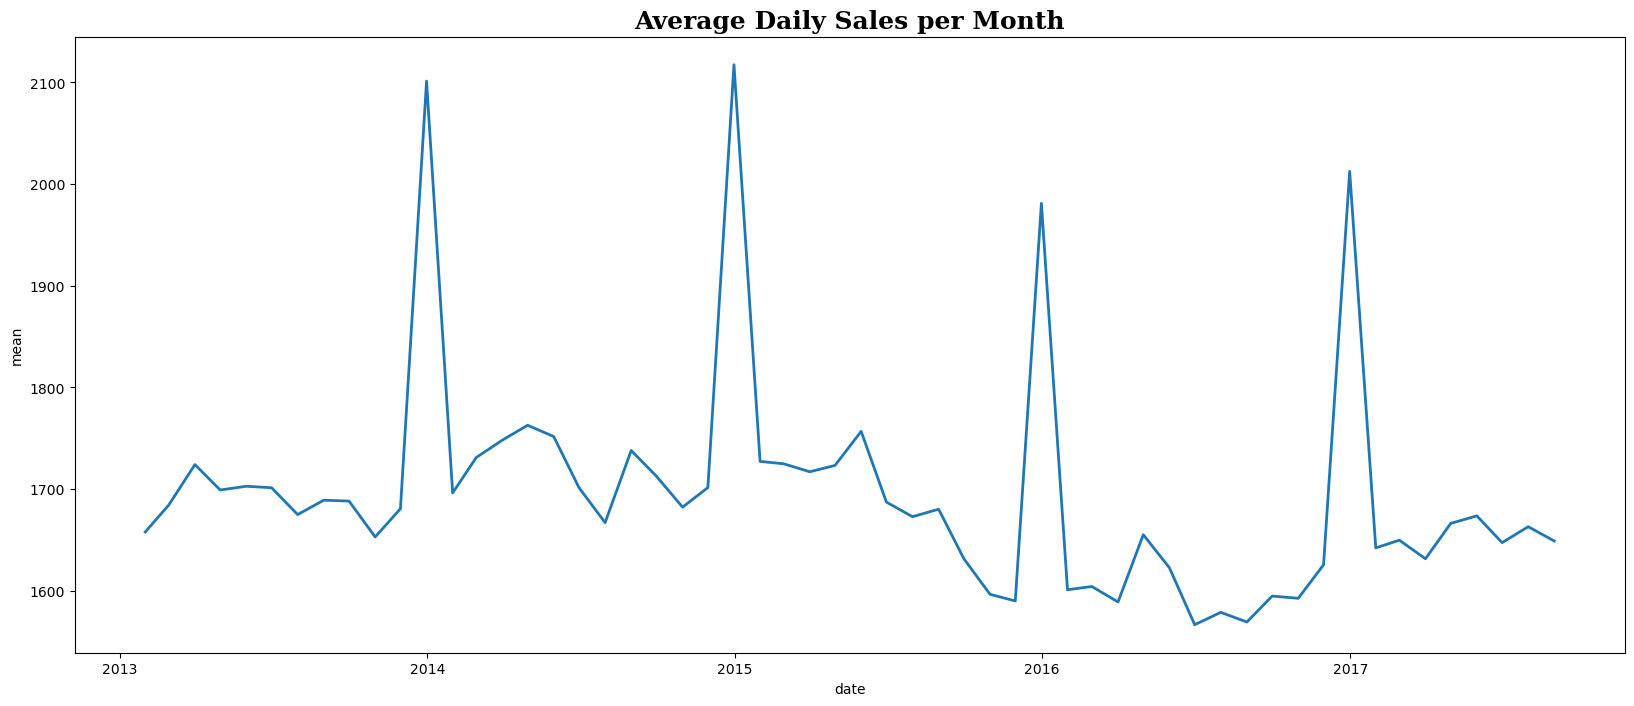

In [5]:
fig = plt.figure(figsize = (20, 8))
sns.lineplot(x = df_grouped_trans_m['date'], y= df_grouped_trans_m['mean'], linewidth=2, )
plt.title("Average Daily Sales per Month",
          fontsize = 18,
          fontweight = 'bold',
          fontfamily = 'serif',
          loc = 'center')

In [6]:
print(df_grouped_trans_m.shape)

# first 36 rows as training
train = df_grouped_trans_m[0:36]

# remaining rows for testing
test = df_grouped_trans_m[36:]

print(train.shape, test.shape)

(56, 2)
(36, 2) (20, 2)


In [7]:
train.head()

,date,mean
0,2013-01-31,1657.898624
1,2013-02-28,1684.483696
2,2013-03-31,1724.181627
3,2013-04-30,1699.206522
4,2013-05-31,1702.874396


In [8]:
test

,date,mean
36,2016-01-31,1601.083727
37,2016-02-29,1604.292778
38,2016-03-31,1589.066423
39,2016-04-30,1655.218239
40,2016-05-31,1622.737066
41,2016-06-30,1566.706289
42,2016-07-31,1578.872185
43,2016-08-31,1569.375619
44,2016-09-30,1594.878272
45,2016-10-31,1592.686003


In [ ]:
#Step 4. ARIMA model

In [10]:
!pip install pmdarima --quiet

In [11]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Run combinations of ARIMA(p,d,q)
model_fit = auto_arima(train['mean'],
                       m=12,
                       d=0,
                       D=0,
                       max_order=None,                       
                       max_p=7,
                       max_q=7,
                       max_d=2,
                       max_P=4,
                       max_Q=4,
                       max_D=2,
                       maxiter = 50,
                       alpha = 0.05,
                       n_jobs = -1,
                       seasonal=True,
                       trace=True,
                       error_action='ignore',  
                       suppress_warnings=True, 
                       stepwise=True
                      )

model_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=444.539, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=445.122, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=442.871, Time=0.16 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=640.994, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=447.070, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=440.270, Time=0.58 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=3.22 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=442.326, Time=0.40 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=445.655, Time=0.51 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=445.097, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   36
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 12)   Log Likelihood                -215.135
Date:                            Tue, 21 Feb 2023   AIC                            440.270
Time:                                    11:01:15   BIC                            448.188
Sample:                                         0   HQIC                           443.034
                                             - 36                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1799.6533    456.019      3.946      0.000     905.872    2693.435
ar.L1         -0.2689      0.225     -1.196      0.232      -0.709       0.172
ar.S.L12       0.7732      0.292      2.646      0.008       0.201       1.346
ar.S.L24      -0.6047      0.211     -2.868      0.004      -1.018      -0.192
sigma2      6340.1886   2696.488      2.351      0.019    1055.169    1.16e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.44   Jarque-Bera (JB):                20.61
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                             1.08
Prob(H) (two-sided):                  0.76   Kurtosis:                         6.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
model_fit

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(2, 0, 0, 12),
      suppress_warnings=True)

<AxesSubplot: >

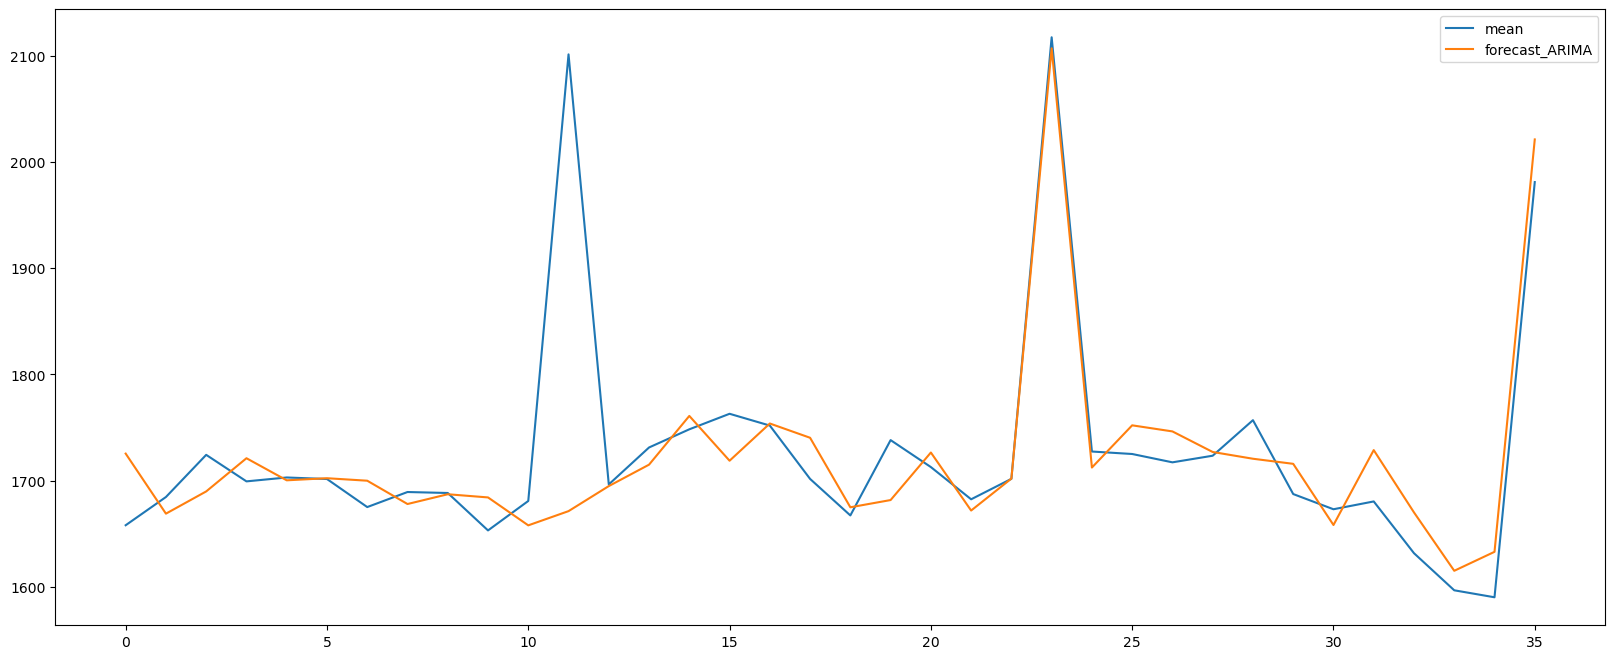

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the ARIMA model
model_ARIMA = ARIMA(train['mean'],
              order=(1,0,0),
              seasonal_order=(2, 0, 0, 12)
            )

# Fit the model
model_ARIMA = model_ARIMA.fit()

train_forecast = train.copy()
test_forecast = test.copy()

train_forecast['forecast_ARIMA'] = model_ARIMA.predict()
train_forecast[['mean','forecast_ARIMA']].plot(figsize=(20,8))

<AxesSubplot: >

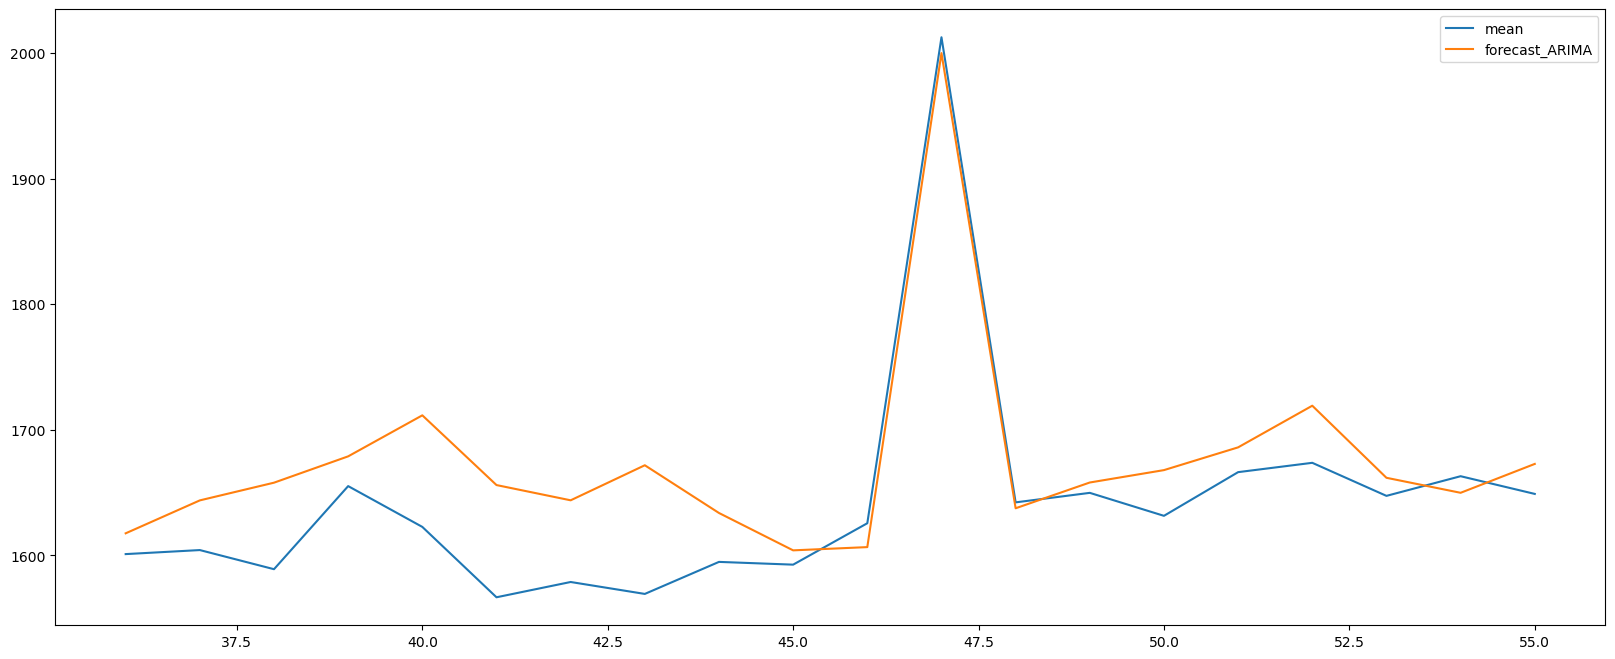

In [15]:
# Forecast and compare against test data

# start date
start = len(train)

# End date
end = len(train)+len(test)-1

test_forecast['forecast_ARIMA'] = model_ARIMA.predict(start=start, end=end, )
test_forecast[['mean','forecast_ARIMA']].plot(figsize=(20,8))

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("RMSE of Auto ARIMA:", np.sqrt(mean_squared_error(test_forecast['mean'], test_forecast['forecast_ARIMA'])))
print("MAE of Auto ARIMA:", mean_absolute_error(test_forecast['mean'], test_forecast['forecast_ARIMA']))

RMSE of Auto ARIMA: 47.294040809746036
MAE of Auto ARIMA: 37.115334921038574


In [17]:
#Prophet
from prophet import Prophet

In [18]:
train_fb = train.copy()
test_fb = test.copy()

train_fb.columns = ['ds','y']
test_fb.columns = ['ds','y']

train_fb.head()

,ds,y
0,2013-01-31,1657.898624
1,2013-02-28,1684.483696
2,2013-03-31,1724.181627
3,2013-04-30,1699.206522
4,2013-05-31,1702.874396


11:08:05 - cmdstanpy - INFO - Chain [1] start processing
11:08:06 - cmdstanpy - INFO - Chain [1] done processing


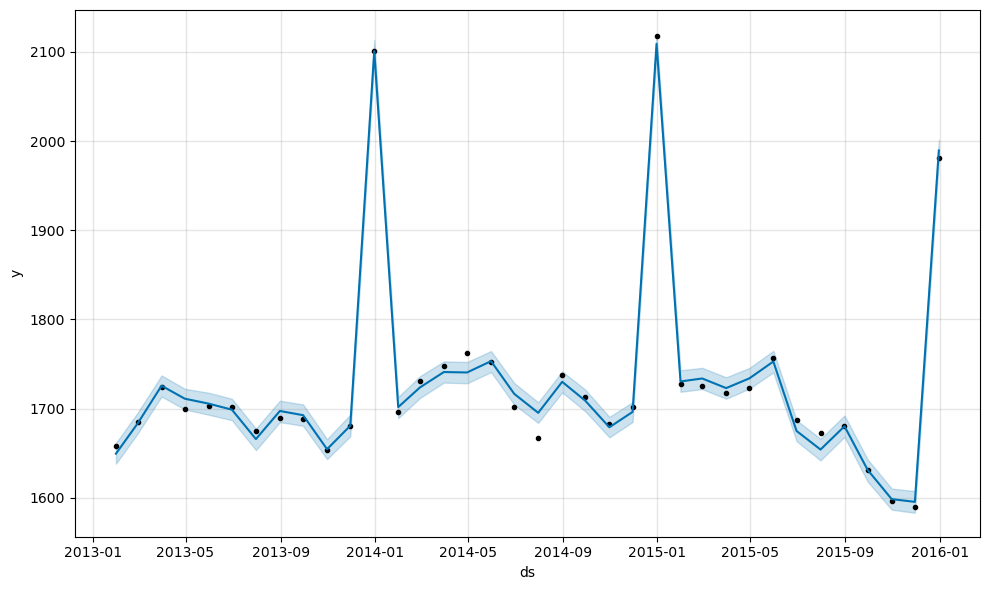

In [19]:
model_prophet = Prophet()
model_prophet.fit(train_fb)

forecast = model_prophet.predict()
fig = model_prophet.plot(forecast)

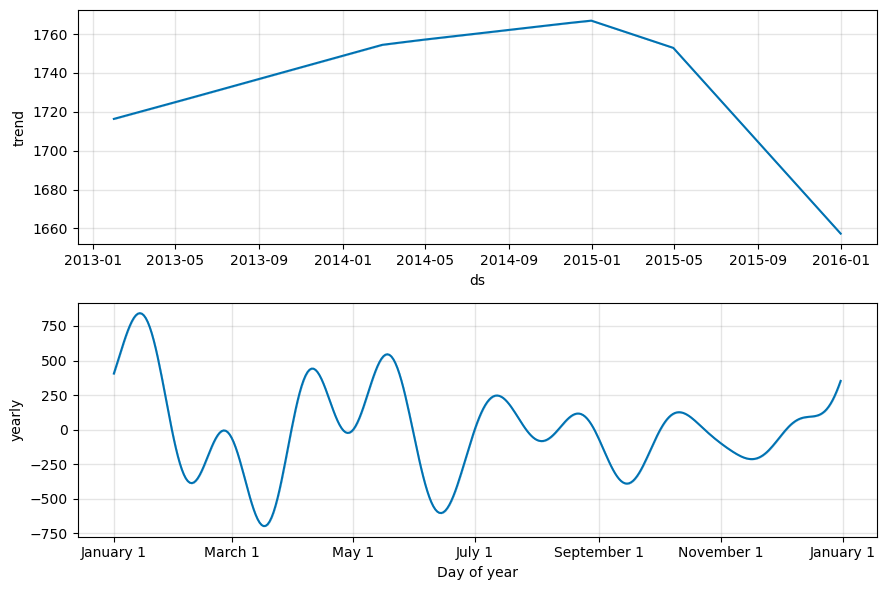

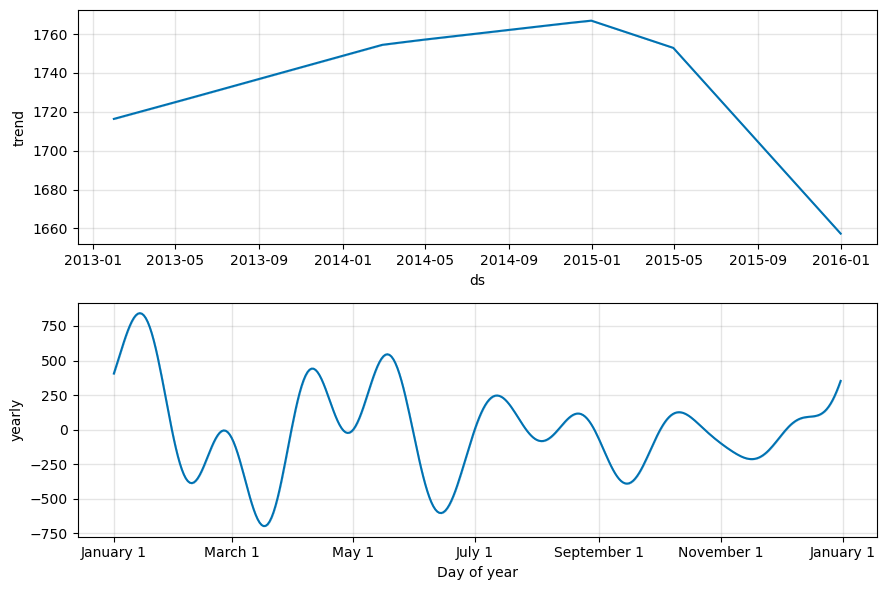

In [20]:
forecast = model_prophet.predict(train_fb)
model_prophet.plot_components(forecast)

<AxesSubplot: >

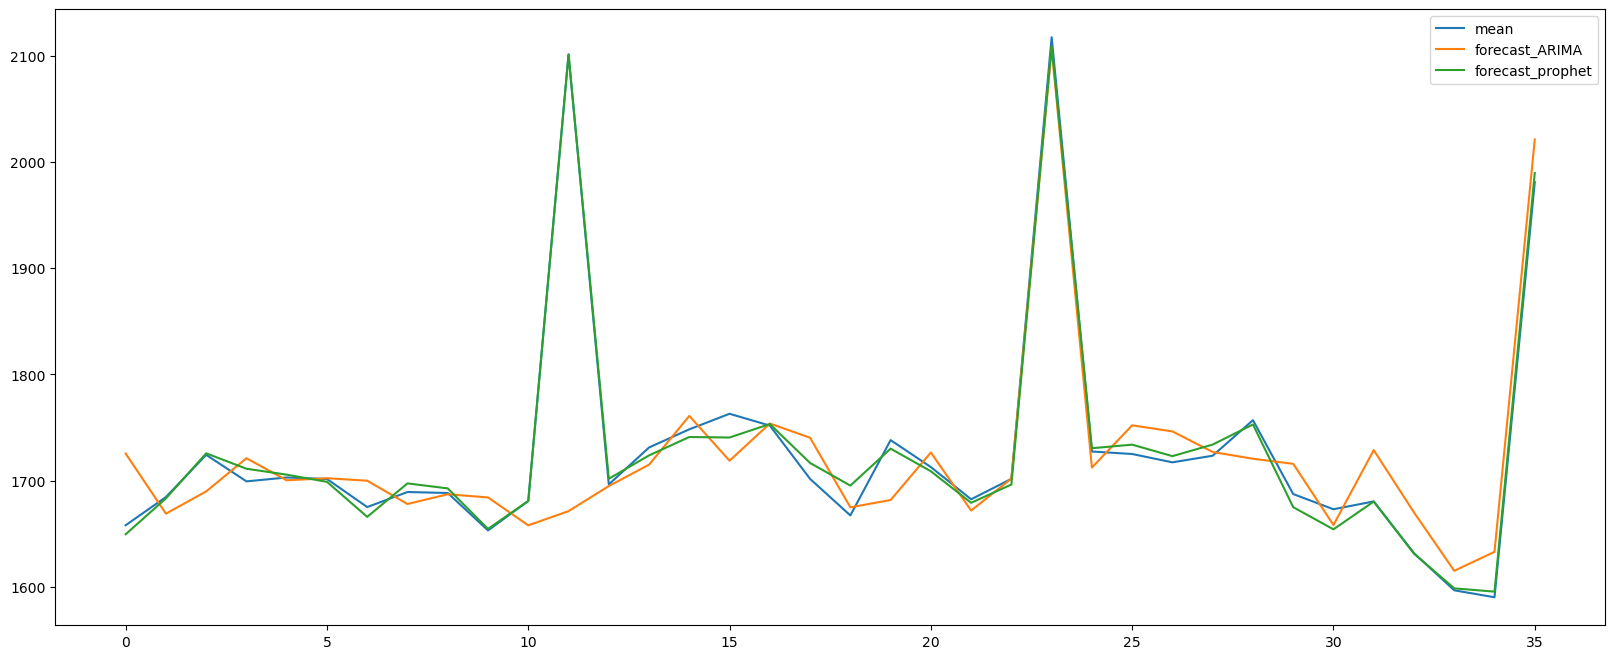

In [21]:
train_forecast['forecast_prophet'] = forecast['yhat']
train_forecast[['mean', 'forecast_ARIMA','forecast_prophet']].plot(figsize=(20,8))

<AxesSubplot: >

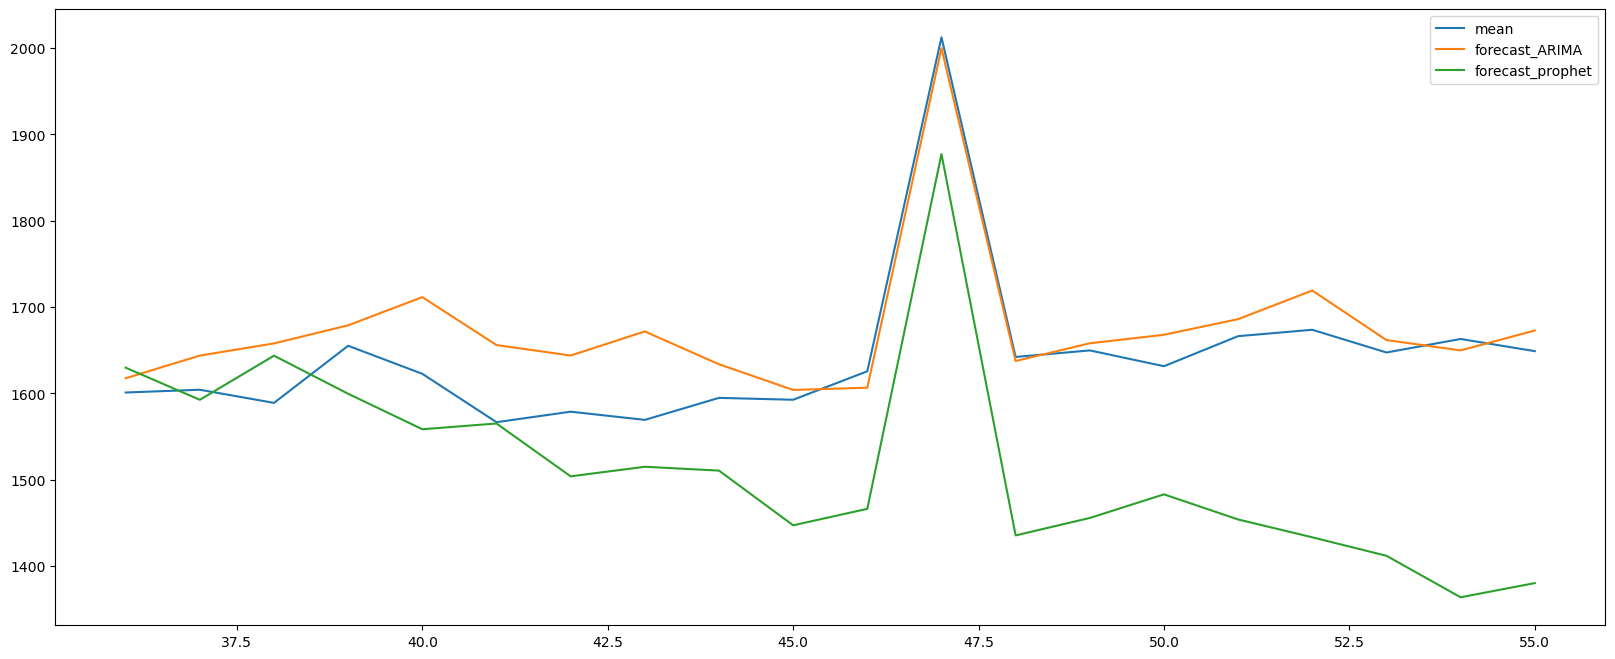

In [22]:
future_data = model_prophet.make_future_dataframe(periods=20, freq='M')
forecast = model_prophet.predict(future_data)

test_forecast['forecast_prophet'] = forecast[36:]['yhat']
test_forecast[['mean','forecast_ARIMA', 'forecast_prophet']].plot(figsize=(20,8))

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("RMSE of Auto ARIMA:", np.sqrt(mean_squared_error(test_forecast['mean'], test_forecast['forecast_ARIMA'])))
print("MAE of Auto ARIMA:", mean_absolute_error(test_forecast['mean'], test_forecast['forecast_ARIMA']))

print("---------------------------------------------\nRMSE of Facebook Prophet:", np.sqrt(mean_squared_error(test_forecast['mean'], test_forecast['forecast_prophet'])))
print("MAE of Facebook Prophet:", mean_absolute_error(test_forecast['mean'], test_forecast['forecast_prophet']))

RMSE of Auto ARIMA: 47.294040809746036
MAE of Auto ARIMA: 37.115334921038574
---------------------------------------------
RMSE of Facebook Prophet: 160.3370890471167
MAE of Facebook Prophet: 133.76340852464074


In [ ]:
#HOMEWORK 
#oil.csv